In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('c:/data/train.csv')
test_data = pd.read_csv('c:/data/test.csv')

train_data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [73]:
test_data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [74]:
# 결측값 처리
train_data = train_data.fillna(train_data.mean())  # train 데이터의 결측치를 평균값으로 대체
test_data = test_data.fillna(test_data.mean())  # test 데이터의 결측치를 평균값으로 대체

In [75]:
# 특성과 레이블 분리
X_train = train_data.drop('count', axis=1)
y_train = train_data['count']
X_train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0


In [76]:
y_train

0        49.0
1       159.0
2        26.0
3        57.0
4       431.0
        ...  
1454     21.0
1455     20.0
1456     22.0
1457    216.0
1458    170.0
Name: count, Length: 1459, dtype: float64

In [77]:
# 수치형 특성 선택
numeric_features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 
                    'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 
                    'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

In [78]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 전처리 파이프라인 생성
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [79]:
# 모델 설정
models = [
    ('linear_regression', LinearRegression()),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# 각 모델의 성능 평가
for name, model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    print(f"{name}: Mean Squared Error: {-scores.mean()}")

linear_regression: Mean Squared Error: 2770.3275592917976
random_forest: Mean Squared Error: 1495.6014172904017
gradient_boosting: Mean Squared Error: 1620.9615429915957


In [80]:
# Stacking 모델 설정
stacking_model = StackingRegressor(
    estimators=models,
    final_estimator=LinearRegression()
)

# Stacking 모델의 성능 평가
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking_model', stacking_model)
])
scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(f"Stacking Model: Mean Squared Error: {-scores.mean()}")

# 테스트 데이터에 대한 예측
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(test_data)

# submission 데이터프레임에 예측값 추가
submission = pd.DataFrame({'id': test_data['id'], 'count': predictions})

submission.head()

Stacking Model: Mean Squared Error: 1498.569018468776


,id,count
0,0,91.630105
1,1,221.868724
2,2,63.449426
3,4,29.135948
4,5,69.119105


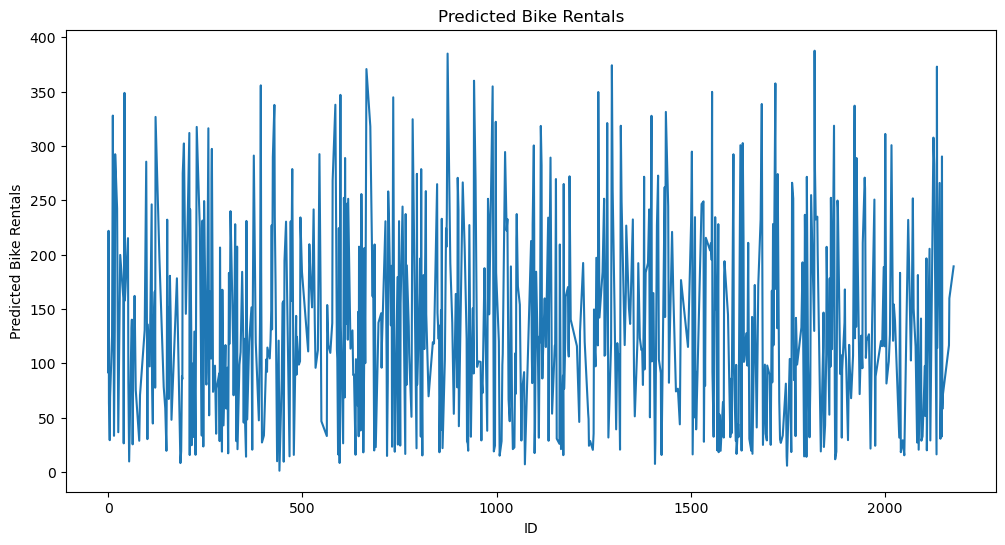

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(submission['id'], submission['count'], label='Predicted Count')
plt.title('Predicted Bike Rentals')
plt.xlabel('ID')  
plt.ylabel('Predicted Bike Rentals')  
plt.show()

In [ ]:
# 'id' 열을 인덱스로 설정
submission.set_index('id', inplace=True)

# submission CSV 파일로 저장
submission.to_csv("C:/data/result.csv", index=True, quoting=3